In [19]:
exec(open("./autoencoderhelperfunctions.py").read())
df = pd.read_csv("./100520_stikhi.csv", index_col = 0)
labels1 = pd.read_csv('./092820_stikhivecs.csv', index_col = 0)
labels2 = labels1[~labels1.text.str.contains('і')].copy()
labels3 = labels2[~labels2.text.str.contains('стихия')].copy()
labels4 = labels3[~labels3.text.str.contains('стихии')].copy()
labels = labels4[~labels4.text.str.contains('стихает')].copy()
labels = labels.dropna()
labels = labels.reset_index(drop = True)

In [14]:
og= df[['0','1','2']]

done
done
Accuracy: 0.9995559502664298


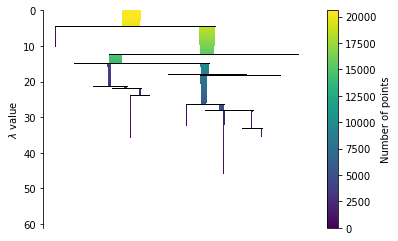

In [51]:
og2 = np.array(og) 
svm_ = return_hdbscansvm(og2, rf = False, svmc= 100, txt_col = labels['text'], clust_size = 90, samp_size = 90, svmx = True, clust_metric = 'manhattan')

make_graph(og2, svm_[0]['text'], svm_[1], colors = "Inferno", PCA = False)
#X1 = og
%matplotlib inline
svm_[2].condensed_tree_.plot(select_clusters = False)

In [54]:
dice = range(0,13)
for_tatyana = []
for i in dice:
    temp = svm_[0][svm_[0][i] == 1]
    res = temp['text'].sample(n=20, random_state=5)
    res = res.reset_index(drop = True)
    for_tatyana.append(res)
    
    
for j, i in enumerate(for_tatyana):
    print('\n')
    print('TOPIC' + ' ' + str(j) + '\n')
    for n in i:
        print(n)



TOPIC 0

('Мои стихи:    \r\n>Куда идти?', 0)
('Морда у Генриха опухшая, глазки маленькие, стихи гениальные.', 0)
('...Читал стихи «Путевой дневник» В. Инбер.', 0)
('Готовлю стихи.', 0)
('Заболоцкий читал стихи.', 0)
('Лиде очень понравились стихи Асадова.', 0)
('Читал ей стихи.', 0)
('— Мои стихи «Приближается звук…» запомнил почти наизусть.', 0)
('Вечером читала стихотворения в прозе Тургенева.', 0)
('Василий Каменский говорит свои стихи.', 0)
('*) пел и читал стихи.', 0)
('Затем Максимилиан читал свои стихи.', 0)
('Читала Верочкины стихи (кончила).', 0)
('Прочла три стихотворения.', 0)
('Я гулял с Яшенькой, читал стихи и роман Бёлля.', 0)
('Любит стихи.', 0)
('Пастернак — все стихи.', 0)
('Приехала Люда Савельева, мы пили чай, читали стихи.', 0)
('показывал Оленькины стихи, будто пятилетняя писала.', 0)
('Ночью писала стихи экспромтом.', 0)


TOPIC 1

('Детская книжка о стихе.', 1)
('И даже, когда я упомянул о стихотворении «На смерть Пушкина», Ш-ко с неудовольствием спросил: «Неу

In [33]:
 svm_[1]

array([15, 21, 18, ..., 16,  6,  9])

In [55]:
df['entry_type'] =  svm_[1]
df.to_csv('./101120_stikhicats.csv')